## Statistical NLP -Project

---

### Alok Sawant 

#### Part A

---

####Digital content management

In [10]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings('ignore')
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
data = pd.read_csv('/content/gdrive/MyDrive/NLP/blogtext.csv')

In [8]:
data.shape

(681284, 7)

In [10]:
data.sample(5)

,id,gender,age,topic,sign,date,text
28726,3568314,female,40,indUnk,Virgo,"14,June,2004",urlLink My would-be profile shot&nb...
106854,2560767,male,17,indUnk,Virgo,"23,January,2004",what up playas I just reali...
196976,1432406,female,16,indUnk,Gemini,"16,April,2003",I'm a fluke? =(
552961,3363676,male,23,Internet,Libra,"27,May,2004",urlLink Yahoo! News - New York ...
176498,316316,female,24,Education,Virgo,"08,October,2003",I am stressed. I am not enjoying ...


In [13]:
data = pd.read_csv('/content/gdrive/MyDrive/NLP/blogtext.csv',nrows=100000)

In [ ]:
data.head(10)

In [14]:
data.sample(5)

,id,gender,age,topic,sign,date,text
15584,1818292,female,26,indUnk,Aquarius,"12,February,2004",Getting to know... JHOETTE ARCHE...
74757,3105869,female,23,Student,Capricorn,"11,July,2004",urlLink Rachel and Napoleon&nbsp; u...
5854,2821801,female,27,indUnk,Taurus,"09,June,2004","These, taken at lunch time (on the ..."
77489,3234117,female,24,Student,Libra,"01,July,2004",I was driving home tonight an...
9121,2581876,female,24,indUnk,Sagittarius,"26,May,2004",you stood there-- inconspicuous is th...


In [15]:
data.info

<bound method DataFrame.info of             id  ...                                               text
0      2059027  ...             Info has been found (+/- 100 pages,...
1      2059027  ...             These are the team members:   Drewe...
2      2059027  ...             In het kader van kernfusie op aarde...
3      2059027  ...                   testing!!!  testing!!!          
4      3581210  ...               Thanks to Yahoo!'s Toolbar I can ...
...        ...  ...                                                ...
99995  1709399  ...              THE HINDU - 125 YEARS             ...
99996  1709399  ...              DILBERT & IIT-ans                 ...
99997  1709399  ...              Case Study : How HP won $3 billion...
99998  1709399  ...              Championing Chennai               ...
99999  1709399  ...              WEEKEND                         It...

[100000 rows x 7 columns]>

In [16]:
data.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

In [17]:
data.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


#### EDA

In [18]:
data.isna().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

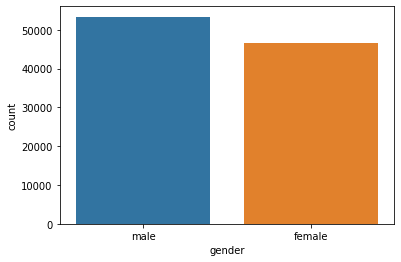

In [19]:
sns.countplot(x='gender',data=data)

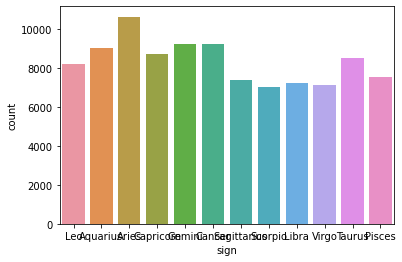

In [20]:
sns.countplot(x='sign',data=data)

#### Preprocessing the Data

In [21]:
pattern = "[^\w ]"
data.text = data.text.apply(lambda s : re.sub(pattern,"",s))

In [22]:
data.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow CocaCola has a way of sum...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",If anything Korea is a country of...
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [23]:
# Convert to lowercase

data.text = data.text.apply(lambda s: s.lower())

In [24]:
data.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [25]:
#Removing unwanted spaces

data.text = data.text.apply(lambda s: s.strip())

In [26]:
data.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
stop_words=set(stopwords.words('english'))

In [30]:
data.text = data.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stop_words]) )

In [31]:
data.head(15)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",interesting conversation dad morning talking k...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",somehow cocacola way summing things well early...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",anything korea country extremes everything see...
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",take read news article urllink joongang ilbo n...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",surf english news sites lot looking tidbits ko...


In [32]:
data.drop(labels=['id','date'], axis=1,inplace=True)

In [33]:
data.head(15)

,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...
5,male,33,InvestmentBanking,Aquarius,interesting conversation dad morning talking k...
6,male,33,InvestmentBanking,Aquarius,somehow cocacola way summing things well early...
7,male,33,InvestmentBanking,Aquarius,anything korea country extremes everything see...
8,male,33,InvestmentBanking,Aquarius,take read news article urllink joongang ilbo n...
9,male,33,InvestmentBanking,Aquarius,surf english news sites lot looking tidbits ko...


In [34]:
data['labels'] = data.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)


In [35]:
data.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [36]:
data.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [37]:
data.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [38]:
# Seperating features and labels 
# Creating test and train data

X= data.text
y = data.labels

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [40]:
print(X_train.shape)
print(y_train.shape)

(80000,)
(80000,)


In [41]:
print(X_test.shape)
print(y_test.shape)

(20000,)
(20000,)


In [42]:
X_test

6448                      bird buries head mashed potatoes
50680    ok seriously ruined day like mad right wouldnt...
814      astro vs braves got back minute maid stadium d...
20354    greetings welcome first ever blog concept behi...
49224    walks door room always brightens perfect figur...
                               ...                        
47661    hey cool jo problem understandable sounds lots...
56256    last night went see new harry potter movie hon...
92555    urllink instant messages come bearing malice i...
36328    srajan gamers sections class 8th entered compu...
73345    monqiue got back together wasnt quite dramatic...
Name: text, Length: 20000, dtype: object

In [43]:
# Count Vectorizer

cvect = CountVectorizer(ngram_range=(1,2))

In [44]:
cvect.fit(X_train)
len(cvect.vocabulary_)

4517090

In [45]:
cvect.get_feature_names()

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '0000

In [46]:
X_train_ct = cvect.transform(X_train)

In [47]:
type(X_train_ct)

scipy.sparse.csr.csr_matrix

In [48]:
X_train_ct

<80000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 13894625 stored elements in Compressed Sparse Row format>

In [49]:
X_train_ct[0]

<1x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 483 stored elements in Compressed Sparse Row format>

In [50]:
X_test_ct = cvect.transform(X_test)

In [51]:
X_test_ct

<20000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 2633973 stored elements in Compressed Sparse Row format>

In [52]:
cvect.get_feature_names()[:10]

['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning']

In [53]:
print(X_train_ct)

  (0, 10607)	1
  (0, 10627)	1
  (0, 11033)	1
  (0, 11034)	1
  (0, 13953)	1
  (0, 13954)	1
  (0, 42119)	1
  (0, 42120)	1
  (0, 43719)	1
  (0, 43827)	1
  (0, 67010)	1
  (0, 67011)	1
  (0, 92180)	1
  (0, 92184)	1
  (0, 113011)	1
  (0, 113907)	1
  (0, 120596)	2
  (0, 123016)	2
  (0, 181859)	1
  (0, 181920)	1
  (0, 244805)	1
  (0, 244878)	1
  (0, 258494)	1
  (0, 258690)	1
  (0, 263762)	1
  :	:
  (79999, 489553)	1
  (79999, 490590)	1
  (79999, 685736)	1
  (79999, 686275)	1
  (79999, 987793)	1
  (79999, 990497)	1
  (79999, 1275446)	1
  (79999, 1664615)	1
  (79999, 1668927)	1
  (79999, 1934343)	1
  (79999, 1936464)	1
  (79999, 2334456)	1
  (79999, 2335872)	1
  (79999, 2680191)	1
  (79999, 2682769)	1
  (79999, 2689599)	1
  (79999, 2690051)	1
  (79999, 3250596)	1
  (79999, 3250640)	1
  (79999, 3892432)	1
  (79999, 3894880)	1
  (79999, 3948360)	1
  (79999, 3948560)	1
  (79999, 4052512)	1
  (79999, 4052642)	1


In [ ]:
print(X_test_ct)

  (0, 997107)	1
  (0, 2920887)	1
  (0, 2921726)	1
  (0, 2966878)	1
  (0, 4204037)	2
  (0, 4234543)	1
  (1, 1297409)	1
  (1, 1298438)	1
  (1, 1504964)	1
  (1, 1666185)	2
  (1, 1669671)	1
  (1, 1669784)	1
  (1, 1701281)	1
  (1, 1702337)	1
  (1, 1883110)	1
  (1, 1884001)	1
  (1, 2357884)	1
  (1, 2358698)	1
  (1, 2391966)	1
  (1, 2392241)	1
  (1, 2624104)	1
  (1, 2722281)	1
  (1, 2724000)	1
  (1, 2808212)	1
  (1, 2814070)	1
  :	:
  (19999, 1497042)	1
  (19999, 1497452)	1
  (19999, 1547599)	1
  (19999, 1548010)	1
  (19999, 1553855)	1
  (19999, 1556676)	1
  (19999, 2057400)	2
  (19999, 2057750)	1
  (19999, 2059950)	1
  (19999, 2212346)	1
  (19999, 2213412)	1
  (19999, 2343093)	1
  (19999, 2513947)	1
  (19999, 3020637)	1
  (19999, 3540137)	1
  (19999, 3949964)	1
  (19999, 4021513)	1
  (19999, 4029237)	1
  (19999, 4030905)	1
  (19999, 4032112)	1
  (19999, 4065985)	1
  (19999, 4195180)	1
  (19999, 4397221)	1
  (19999, 4397940)	1
  (19999, 4506271)	1


In [54]:
# Creating a dictionary

label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [55]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 '47': 1,
 '48': 1,
 'Accounting': 528,
 'Advertising': 766,
 'Agriculture': 168,
 'Aquarius': 9050,
 'Architecture': 83,
 'Aries': 10637,
 'Arts': 5031,
 'Automotive': 124,
 'Banking': 354,
 'Biotech': 324,
 'BusinessServices': 626,
 'Cancer': 9253,
 'Capricorn': 8723,
 'Chemicals': 305,
 'Communications-Media': 2830,
 'Construction': 250,
 'Consulting': 905,
 'Education': 5553,
 'Engineering': 2332,
 'Environment': 6,
 'Fashion': 1898,
 'Gemini': 9225,
 'Government': 2055,
 'HumanResources': 209,
 'Internet': 2251,
 'InvestmentBanking': 244,
 'Law': 360,
 'LawEnforcement-Security': 368,
 'Leo': 8230,
 'Libra': 7250,
 'Manufacturing': 542,
 'Maritime': 59,
 'Marketing': 726,
 'Military': 798,
 'Museums-Libraries': 308,
 'Non-Profit': 1326,
 'Pisces'

In [56]:
# Transform the labels

from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [57]:
y_train = binarizer.fit_transform(y_train)

In [58]:
y_test = binarizer.transform(y_test)

In [59]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [60]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [61]:
# Predictions and Accuracy

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
model=LogisticRegression(solver='lbfgs', max_iter=1)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1))

In [63]:
Ypred=model.predict(X_test_ct)

In [64]:
Ypred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [66]:
# Macro Average Method

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    

In [67]:
display_metrics_micro(y_test,Ypred)

Accuracy score:  0.0
F1 score: Micro 0.04670060543769773
Average precision score: Micro 0.052120234868517704
Average recall score: Micro 0.024233333333333332


In [68]:
display_metrics_macro(y_test,Ypred)

Accuracy score:  0.0
F1 score: Macro 0.0031480785246127173
Average recall score: MAcro 0.0019387709334858683


In [69]:
display_metrics_weighted(y_test,Ypred)

Accuracy score:  0.0
F1 score: weighted 0.039375961154267974
Average precision score: weighted 0.2587702352997602
Average recall score: weighted 0.024233333333333332


In [70]:
preds = Ypred[:15]
actuals = y_test[:15]

In [71]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Aries', 'Fashion', 'male'),
 ('Libra', 'Student', 'male'),
 ('Sagittarius', 'indUnk', 'male'),
 ('Aquarius', 'indUnk', 'male'),
 ('Cancer', 'Student', 'male'),
 ('Pisces', 'Transportation', 'male'),
 ('Arts', 'Capricorn', 'female'),
 ('Capricorn', 'Student', 'male'),
 ('Cancer', 'Religion', 'male'),
 ('Libra', 'indUnk', 'male'),
 ('Aquarius', 'female', 'indUnk'),
 ('Capricorn', 'Consulting', 'female'),
 ('Virgo', 'indUnk', 'male'),
 ('Internet', 'Sagittarius', 'male'),
 ('Scorpio', 'Technology', 'male')]

In [72]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[(), ('female',), (), (), (), (), (), (), (), (), (), (), ('female',), (), ()]

In [73]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])

()
('Student', 'Virgo', 'male')


In [74]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

()
('Libra', 'female', 'indUnk')


In [75]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('female',)
('Education', 'Pisces', 'male')


In [76]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('male',)
('Pisces', 'Student', 'female')


In [77]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

()
('Libra', 'Student', 'male')


In [78]:
# True and predicted labels for 5 examples

import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])

[17889, 9960, 18619, 16231, 6081]
()
('Aries', 'Technology', 'male')
()
('Gemini', 'Student', 'male')
()
('Gemini', 'indUnk', 'male')
()
('Aquarius', 'indUnk', 'male')
()
('Aries', 'female', 'indUnk')


In [79]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))


Text:	  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442107)	1
  (0, 2442126)	1
  (0, 3036818)	1
True labels:	Aries,Fashion,male
Predicted labels:	


Text:	  (0, 8711)	1
  (0, 9452)	1
  (0, 21144)	1
  (0, 67661)	1
  (0, 67771)	1
  (0, 74496)	1
  (0, 78471)	1
  (0, 120596)	2
  (0, 121772)	1
  (0, 126920)	1
  (0, 157801)	2
  (0, 157893)	1
  (0, 178920)	1
  (0, 182108)	1
  (0, 182417)	1
  (0, 183363)	2
  (0, 194027)	1
  (0, 202361)	5
  (0, 204077)	1
  (0, 205064)	1
  (0, 239970)	1
  (0, 240321)	1
  (0, 241441)	1
  (0, 241749)	1
  (0, 253541)	9
  :	:
  (0, 4449080)	1
  (0, 4449591)	1
  (0, 4449622)	1
  (0, 4450746)	3
  (0, 4451462)	1
  (0, 4451494)	1
  (0, 4452125)	1
  (0, 4456092)	2
  (0, 4456694)	1
  (0, 4463749)	2
  (0, 4464331)	2
  (0, 4469199)	1
  (0, 4469266)	1
  (0, 4471407)	1
  (0, 4490043)	1
  (0, 4490712)	1
  (0, 4497129)	1
  (0, 4497648)	1
  (0, 4499761)	2
  (0, 4500860)	1
  (0, 4501718)	1
  (0, 4503106)	1
  (0, 4503264)	1
  (0, 4505960)	1
  (0, 4506082)

In [80]:
# Linear SVC

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [86]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")

KeyboardInterrupt: ignored


#### Part B
---

#### Chatbot

In [12]:
import io
import random
import string # to process standard python strings
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [13]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) # for downloading packages
nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
f=open('/content/gdrive/MyDrive/NLP/GL Bot.json','r',errors = 'ignore')
raw=f.read()
raw = raw.lower()# converts to lowercase

In [91]:
ent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [15]:
# Preprocessing

lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [16]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
GREETING_RESPONSES = ["hi", "hey", "*nods*", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [17]:
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [19]:
flag=True
print("ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you' ):
            flag=False
            print("ROBO: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("ROBO: "+greeting(user_response))
            else:
                print("ROBO: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("ROBO: Bye! take care..")

ROBO: My name is Robo. I will answer your queries about Chatbots. If you want to exit, type Bye!
hi
ROBO: hey
hello
ROBO: hey
sup
ROBO: hello
bye
ROBO: Bye! take care..
